In [283]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt                               
import os 
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
matplotlib.rcParams["figure.dpi"] = 150
from particle import PDGID
from utils import delphesRootToPixelAvTrackList as utils

In [284]:
datadir = '/home/youeric/PixelSim/PixSim/'
flp = 0

In [285]:
truthbib = pd.DataFrame()
recon2Dbib = pd.DataFrame()
truthsig = pd.DataFrame()
recon2Dsig = pd.DataFrame()

for file in os.listdir(datadir):
    if "labels" in file:
        if "bib" in file: 
            truthbib = pd.concat([truthbib,pd.read_parquet(f"{datadir}{file}")])
            file = file.replace("labels","recon2D")
            recon2Dbib = pd.concat([recon2Dbib,pd.read_parquet(f"{datadir}{file}")])
        elif "sig" in file: 
            truthsig = pd.concat([truthsig,pd.read_parquet(f"{datadir}{file}")])
            file = file.replace("labels","recon2D")
            recon2Dsig = pd.concat([recon2Dsig,pd.read_parquet(f"{datadir}{file}")])
            
clustersSig = recon2Dsig.to_numpy().reshape(recon2Dsig.shape[0],13,21)
clustersBib = recon2Dbib.to_numpy().reshape(recon2Dbib.shape[0],13,21)

In [286]:
def cutData(truth, recon, data, symbol, val, data2=None, symbol2=None, val2=None):
    if symbol == '>':
        cut = truth[data]>val
    elif symbol == '<':
        cut = truth[data]<val
    elif symbol == '>=':
        cut = truth[data]>=val
    elif symbol == '<=':
        cut = truth[data]<=val
    elif symbol == '==':
        cut = truth[data]==val
    
    if data2 != None:
        if symbol2 == '>':
            cut2 = truth[data2]>val2
        elif symbol2 == '<':
            cut2 = truth[data2]<val2
        elif symbol2 == '>=':
            cut2 = truth[data2]>=val2
        elif symbol2 == '<=':
            cut2 = truth[data2]<=val2
        elif symbol2 == '==':
            cut2 = truth[data2]==val2
        cut = cut & cut2

    truthCut = truth[cut] #.reset_index(inplace=True)
    reconCut = recon[cut] #.reset_index(inplace=True)

    truthCut.reset_index(inplace=True, drop=True)
    reconCut.reset_index(inplace=True, drop=True)

    clustersCut = reconCut.to_numpy().reshape(reconCut.shape[0],13,21)
    
    return truthCut, reconCut, clustersCut

In [287]:
def getYProfiles(clusters):
    profiles = np.sum(clusters, axis = 2)
    #totalCharge = np.sum(profiles, axis = 1, keepdims=True)
    return profiles

def getAverageYProfile(clusters):
    profiles=getYProfiles(clusters)
    return np.mean(profiles, axis=0)

def getXProfiles(clusters):
    profiles = np.sum(clusters, axis = 1)
    #totalCharge = np.sum(profiles, axis = 1, keepdims=True)
    return profiles

def getAverageXProfile(clusters):
    profiles=getXProfiles(clusters)
    return np.mean(profiles, axis=0)

def getClusterYSizes(clusters):
    profiles=getYProfiles(clusters)
    bool_arr = profiles != 0
    return np.sum(bool_arr, axis = 1)

def getAverageClusterYSize(clusters):
    clusterSizes = getClusterYSizes(clusters)
    return np.mean(clusterSizes)

def getClusterXSizes(clusters):
    profiles=getXProfiles(clusters)
    bool_arr = profiles != 0
    return np.sum(bool_arr, axis = 1)

def getAverageClusterXSize(clusters):
    clusterSizes = getClusterXSizes(clusters)
    return np.mean(clusterSizes)

In [288]:
# Here we try to find average y profile and coverence matrix for signal and bib

profileXSig = getAverageXProfile(clustersSig)
profileXBib = getAverageXProfile(clustersBib)
xSizesSig = getClusterXSizes(clustersSig)
xSizesBib = getClusterXSizes(clustersBib)

profileYSig = getAverageYProfile(clustersSig)
profileYBib = getAverageYProfile(clustersBib)
ySizesSig = getClusterYSizes(clustersSig)
ySizesBib = getClusterYSizes(clustersBib)

In [289]:
# Save clustersSig to a text file in its original structure
with open("clustersSig.txt", "w") as f:
    for i, cluster in enumerate(clustersSig):
        f.write(f"Cluster {i}:\n")
        np.savetxt(f, cluster, fmt="%.6f", delimiter=',')
        f.write("\n")  # Add a newline between clusters

print("clustersSig has been saved to clustersSig.txt")

clustersSig has been saved to clustersSig.txt


In [290]:
# Compute the Y profiles
y_profiles = getYProfiles(clustersSig)

# Save Y profiles to a text file
np.savetxt("yProfiles.txt", y_profiles, delimiter=',', fmt='%.6f')

print("Y profiles have been saved to yProfiles.txt")

Y profiles have been saved to yProfiles.txt


In [291]:
# Compute the Y profiles
y_profiles = getYProfiles(clustersSig)

# Calculate the variance for each element (column) across all rows
element_variances = np.var(y_profiles, axis=0)

# Print the variances for each element
print("Variance of each element in Y profiles:")
for i, var in enumerate(element_variances):
    print(f"Element {i}: Variance = {var}")

Variance of each element in Y profiles:
Element 0: Variance = 447202.75964194647
Element 1: Variance = 349820.70395435474
Element 2: Variance = 909907.289295306
Element 3: Variance = 5592340.534420078
Element 4: Variance = 13117756.386944532
Element 5: Variance = 12965606.87890796
Element 6: Variance = 13307464.925106345
Element 7: Variance = 2924164.1058150507
Element 8: Variance = 585649.243870784
Element 9: Variance = 310876.5136332367
Element 10: Variance = 186971.44410109628
Element 11: Variance = 104511.74742092018
Element 12: Variance = 90799.6130795278


In [292]:
# Compute the Y profiles
y_profiles = getYProfiles(clustersSig)

# Calculate the standard deviation for each element (column) across all rows
element_stddevs = np.std(y_profiles, axis=0)

# Print the standard deviations for each element
print("Standard deviation of each element in Y profiles:")
for i, std in enumerate(element_stddevs):
    print(f"Element {i}: Standard Deviation = {std}")

Standard deviation of each element in Y profiles:
Element 0: Standard Deviation = 668.7322032338105
Element 1: Standard Deviation = 591.45642608256
Element 2: Standard Deviation = 953.8906065662383
Element 3: Standard Deviation = 2364.813001998272
Element 4: Standard Deviation = 3621.8443349962645
Element 5: Standard Deviation = 3600.7786489741297
Element 6: Standard Deviation = 3647.9398192824324
Element 7: Standard Deviation = 1710.0187442876322
Element 8: Standard Deviation = 765.2772333414761
Element 9: Standard Deviation = 557.5630131502955
Element 10: Standard Deviation = 432.4019473835615
Element 11: Standard Deviation = 323.2827669717645
Element 12: Standard Deviation = 301.32974144536047


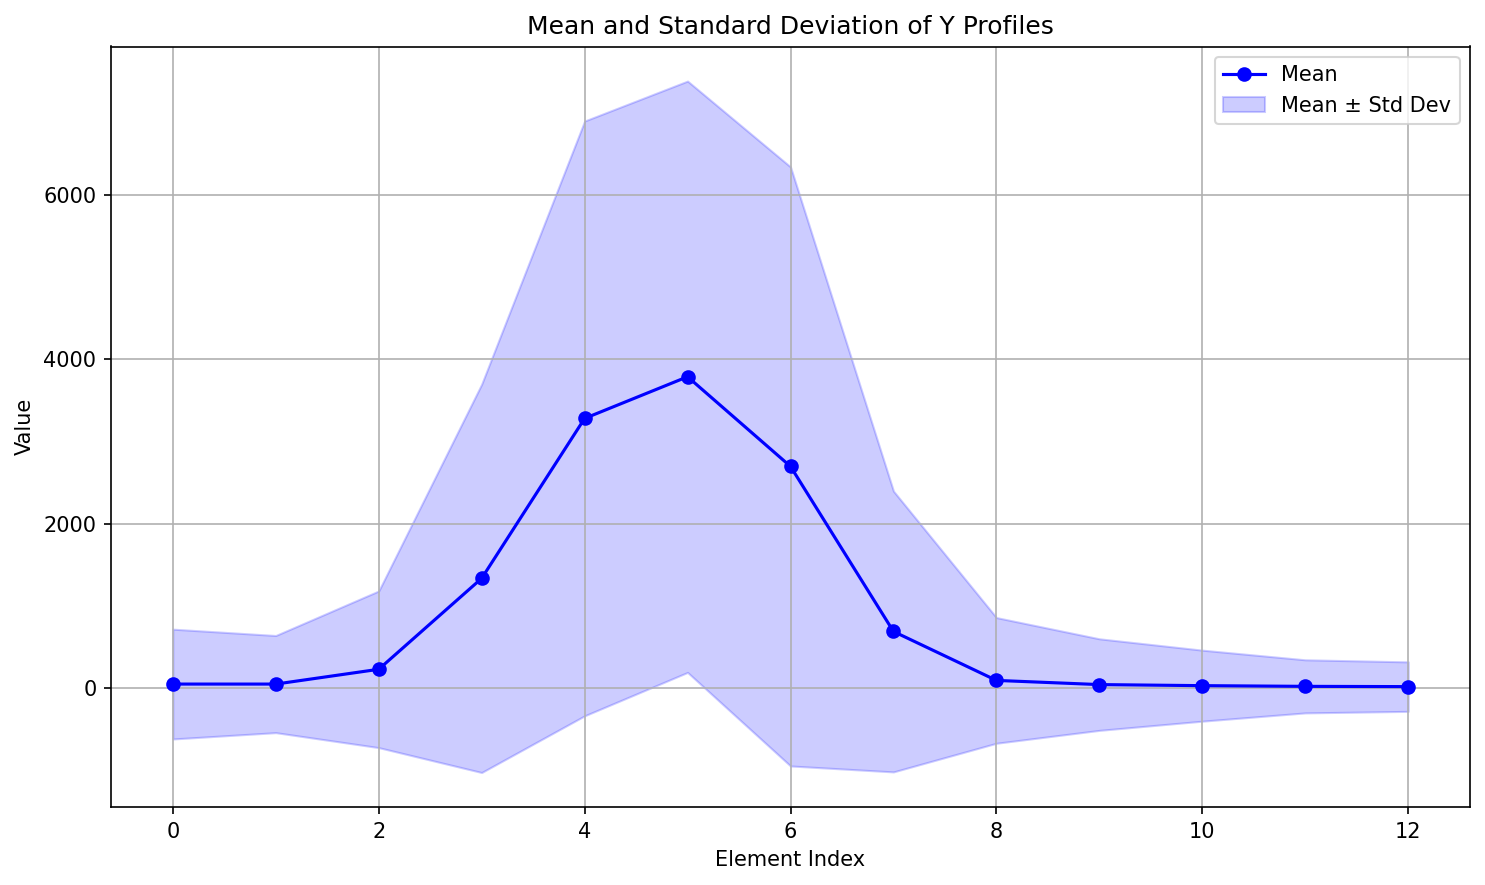

In [293]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the Y profiles
y_profiles = getYProfiles(clustersSig)

# Calculate mean and standard deviation for each element (column)
means = np.mean(y_profiles, axis=0)
std_devs = np.std(y_profiles, axis=0)

# Plot the mean and standard deviation
x_axis = np.arange(len(means))  # Generate x-axis values corresponding to the indices

plt.figure(figsize=(10, 6))
plt.plot(x_axis, means, label='Mean', color='blue', linestyle='-', marker='o')
plt.fill_between(x_axis, means - std_devs, means + std_devs, color='blue', alpha=0.2, label='Mean ± Std Dev')
plt.title('Mean and Standard Deviation of Y Profiles')
plt.xlabel('Element Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [294]:
def remove_outliers_by_iqr(clusters):
    # Compute the Y profiles
    y_profiles = getYProfiles(clusters)
    
    # Calculate IQR for each element (column)
    Q1 = np.percentile(y_profiles, 25, axis=0)  # 25th percentile (Q1)
    Q3 = np.percentile(y_profiles, 75, axis=0)  # 75th percentile (Q3)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify clusters that are within bounds for all elements
    within_bounds = np.all((y_profiles >= lower_bound) & (y_profiles <= upper_bound), axis=1)
    
    # Filter out outlier clusters
    filtered_clusters = clusters[within_bounds]
    
    return filtered_clusters

# Remove outliers from clustersSig
filtered_clustersSig = remove_outliers_by_iqr(clustersSig)

# Verify the new number of clusters
print(f"Original number of clusters: {clustersSig.shape[0]}")
print(f"Filtered number of clusters: {filtered_clustersSig.shape[0]}")


Original number of clusters: 38455
Filtered number of clusters: 17011


# Problem, clusters hitting on side of detector, remedy, get rid of them via data filtering. i.e. simulate data from "centre" hits only, resonable as one can expect ML algorithm to do somewhat the same

In [295]:
def filter_clusters_with_centered_peaks(clusters, central_tolerance=0):
    """
    Filters clusters to keep only those with hits peaking near the center of the frame.
    
    Args:
        clusters (ndarray): The clusters data.
        central_tolerance (float): Fraction of total indices around the center to keep.
    
    Returns:
        tuple: A tuple containing:
            - ndarray: Filtered clusters with hits peaking near the center.
            - int: Number of clusters removed.
    """
    # Compute the Y profiles
    y_profiles = getYProfiles(clusters)
    
    # Get the midpoint of the frame
    midpoint = y_profiles.shape[1] // 2

    print("Midpoint of the frame:", midpoint)
    
    # Define the central region (tolerance applied around midpoint)
    lower_bound = int(midpoint - central_tolerance)
    upper_bound = int(midpoint + central_tolerance)
    
    # Find the peak position for each profile
    peak_indices = np.argmax(y_profiles, axis=1)
    
    # Identify clusters with peaks within the central region
    centered_hits_mask = (peak_indices >= lower_bound) & (peak_indices <= upper_bound)
    
    # Filter clusters
    filtered_clusters = clusters[centered_hits_mask]
    
    # Calculate the number of clusters removed
    clusters_removed = clusters.shape[0] - filtered_clusters.shape[0]
    
    return filtered_clusters, clusters_removed

# Example usage
clustersSig1, clusters_removed = filter_clusters_with_centered_peaks(clustersSig, central_tolerance=0)
print(f"Number of clusters removed: {clusters_removed}")
print(f"Original number of clusters: {clustersSig.shape[0]}")
print(f"Filtered number of clusters: {clustersSig1.shape[0]}")

Midpoint of the frame: 6
Number of clusters removed: 28956
Original number of clusters: 38455
Filtered number of clusters: 9499


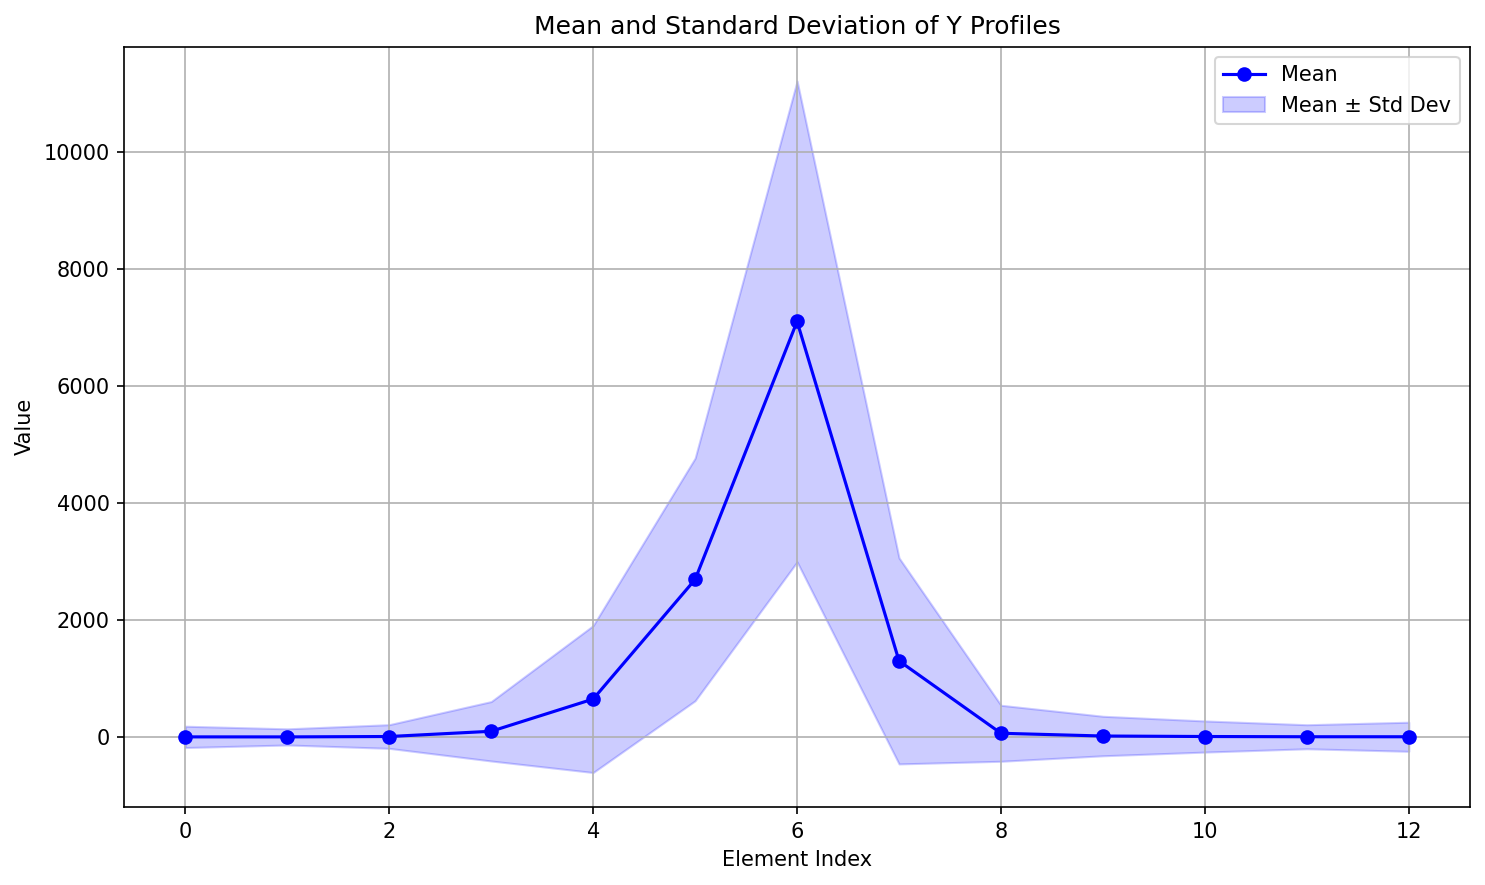

In [296]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the Y profiles
y_profiles = getYProfiles(clustersSig1)

# Calculate mean and standard deviation for each element (column)
means = np.mean(y_profiles, axis=0)
std_devs = np.std(y_profiles, axis=0)

# Plot the mean and standard deviation
x_axis = np.arange(len(means))  # Generate x-axis values corresponding to the indices

plt.figure(figsize=(10, 6))
plt.plot(x_axis, means, label='Mean', color='blue', linestyle='-', marker='o')
plt.fill_between(x_axis, means - std_devs, means + std_devs, color='blue', alpha=0.2, label='Mean ± Std Dev')
plt.title('Mean and Standard Deviation of Y Profiles')
plt.xlabel('Element Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [297]:
# Compute the Y profiles
y_profiles = getYProfiles(clustersSig1)

# Save Y profiles to a text file
np.savetxt("yProfiles2.txt", y_profiles, delimiter=',', fmt='%.6f')

print("Y profiles have been saved to yProfiles2.txt")

Y profiles have been saved to yProfiles2.txt


In [298]:
test = getAverageYProfile(clustersSig)

print(test)

getYProfiles(clustersSig)

def getMiddleElementVariance(clusters):
    # Compute the Y profiles
    profiles = getYProfiles(clusters)
    
    # Find the middle element index (assuming an odd number of elements)
    middle_index = 0  # Middle element along the second axis
    
    # Extract the middle element values across all profiles
    middle_values = profiles[:, middle_index]
    
    # Compute the variance of the middle element
    variance = np.var(middle_values)
    
    return middle_values, variance

# Example usage
middle_values, variance = getMiddleElementVariance(clustersSig)

# Print the variance
print(f"Variance of the element in Y profiles: {variance}")

# Print the first 1000 values of the middle elements
print("First 1000 values of the middle elements in Y profiles:")
print(middle_values[:1000])  # Adjust the slice as needed




[  45.44959043   45.35893902  225.4264725  1333.12747367 3280.6799896
 3788.33433884 2695.99903784  685.69754258   90.0264725    39.10315954
   26.07478871   17.63934469   14.44303732]
Variance of the element in Y profiles: 447202.75964194647
First 1000 values of the middle elements in Y profiles:
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.612e+03 3.003e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0

In [299]:
# Here we convert to Mean and Coverence matrix

def GetMeanVectorY(clusters):
    clusterSizes = getAverageYProfile(clusters)
    return np.mean(clusterSizes)

def getCovarianceMatrixY(clusters):

    # Get the cluster size profile (non-zero pixels along axis 1 and 2 for each cluster)
    clusterProfiles = getYProfiles(clusters)

    # Compute the covariance matrix
    covariance_matrix = np.cov(clusterProfiles, rowvar=False)
    
    return covariance_matrix

Covariance Matrix Shape: (13, 13)


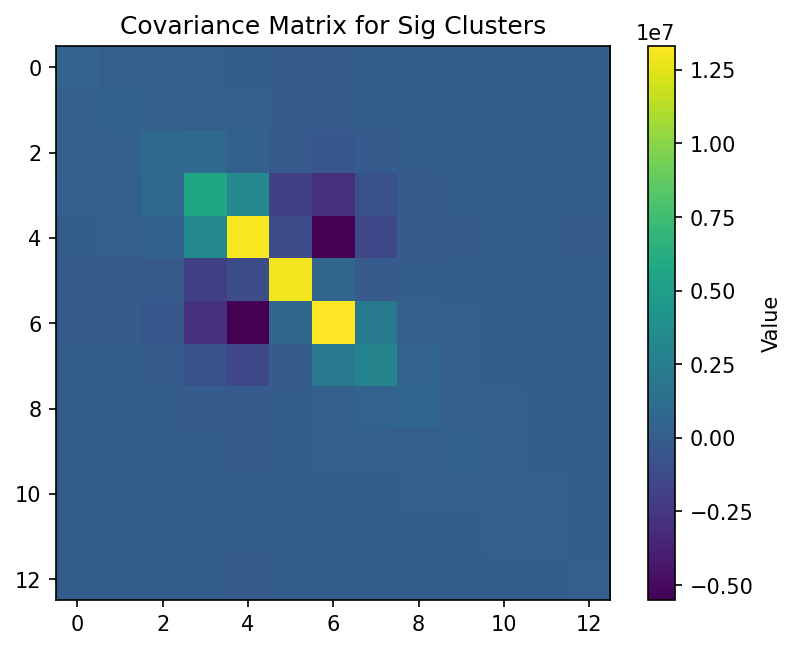

In [300]:
covariance_matrix_sig = getCovarianceMatrixY(clustersSig)

# Print covariance matrix details
print("Covariance Matrix Shape:", covariance_matrix_low_pos.shape)

# Visualize with matplotlib
plt.imshow(covariance_matrix_sig, cmap='viridis')
plt.colorbar(label='Value')
plt.title('Covariance Matrix for Sig Clusters')
plt.show()

Covariance Matrix Shape: (13, 13)


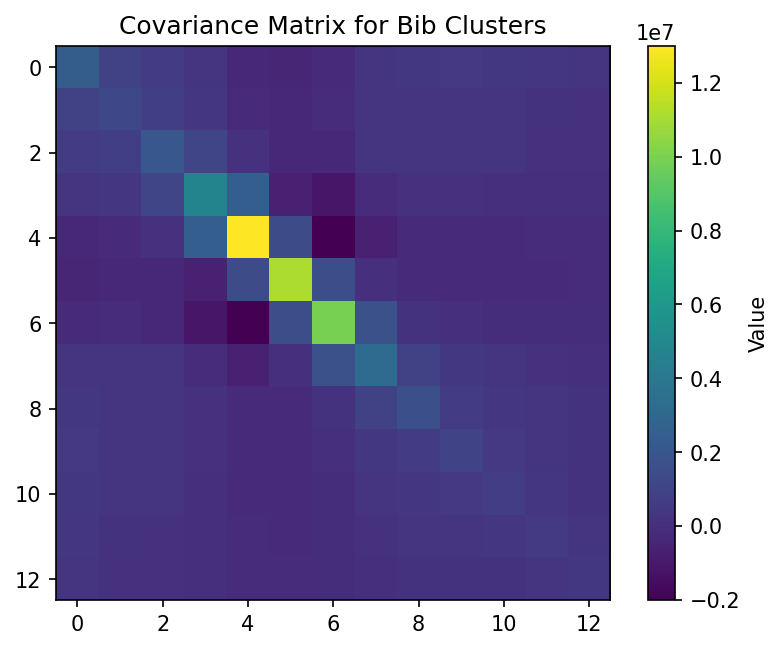

In [301]:
covariance_matrix_bib = getCovarianceMatrixY(clustersBib)

# Print covariance matrix details
print("Covariance Matrix Shape:", covariance_matrix_low_pos.shape)

# Visualize with matplotlib
plt.imshow(covariance_matrix_bib, cmap='viridis')
plt.colorbar(label='Value')
plt.title('Covariance Matrix for Bib Clusters')
plt.show()

In [302]:
# Seperate into out by ylocal

TruthsigLow, recon2DsigLow, clusterssigLow = cutData(truthsig, recon2Dsig, 'y-local', '<', -2)
TruthsigMid, recon2DsigMid, clusterssigMid = cutData(truthsig, recon2Dsig, 'y-local', '>', 0, 'y-local', '<', 2)
TruthsigHigh, recon2DsigHigh, clusterssigHigh = cutData(truthsig, recon2Dsig, 'y-local', '>', 6)

profilesigLow = getAverageYProfile(clusterssigLow)
profilesigMid = getAverageYProfile(clusterssigMid)
profilesigHigh = getAverageYProfile(clusterssigHigh)

TruthbibLow, recon2DbibLow, clustersbibLow = cutData(truthbib, recon2Dbib, 'y-local', '<', -2)
TruthbibMid, recon2DbibMid, clustersbibMid = cutData(truthbib, recon2Dbib, 'y-local', '>', 0, 'y-local', '<', 2)
TruthbibHigh, recon2DbibHigh, clustersbibHigh = cutData(truthbib, recon2Dbib, 'y-local', '>', 6)

profilebibLow = getAverageYProfile(clustersbibLow)
profilebibMid = getAverageYProfile(clustersbibMid)
profilebibHigh = getAverageYProfile(clustersbibHigh)

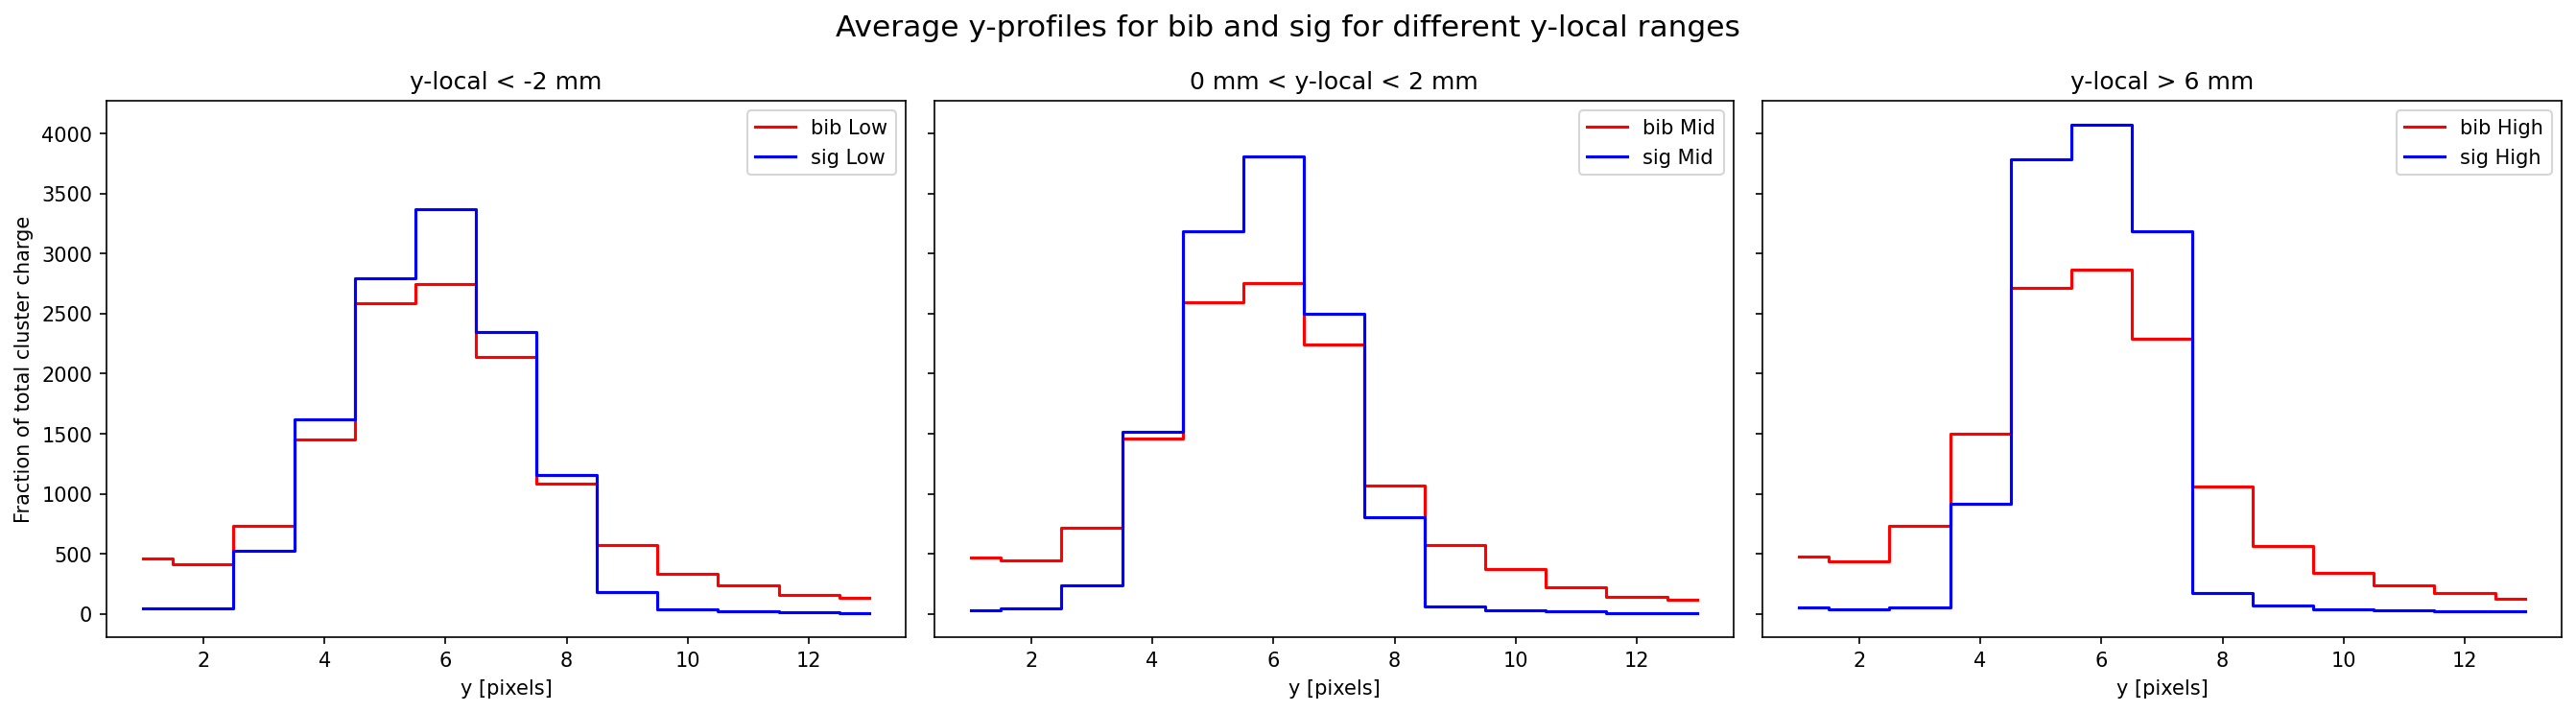

In [303]:
import numpy as np
import matplotlib.pyplot as plt

# Replace these with the actual profile data
yaxis = np.arange(1, 14, 1)
# Plot
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(18, 5))

# Plot for Low profiles
ax[0].step(yaxis, profilebibLow, where="mid", label="bib Low", c='r')
ax[0].step(yaxis, profilesigLow, where="mid", label="sig Low", c='b')
ax[0].legend()
ax[0].set_title("y-local < -2 mm")
ax[0].set_ylabel("Fraction of total cluster charge")
ax[0].set_xlabel("y [pixels]")

# Plot for Mid profiles
ax[1].step(yaxis, profilebibMid, where="mid", label="bib Mid", c='r')
ax[1].step(yaxis, profilesigMid, where="mid", label="sig Mid", c='b')
ax[1].legend()
ax[1].set_title("0 mm < y-local < 2 mm")
ax[1].set_xlabel("y [pixels]")

# Plot for High profiles
ax[2].step(yaxis, profilebibHigh, where="mid", label="bib High", c='r')
ax[2].step(yaxis, profilesigHigh, where="mid", label="sig High", c='b')
ax[2].legend()
ax[2].set_title("y-local > 6 mm")
ax[2].set_xlabel("y [pixels]")

fig.suptitle('Average y-profiles for bib and sig for different y-local ranges', fontsize=15)
plt.tight_layout()
plt.show()


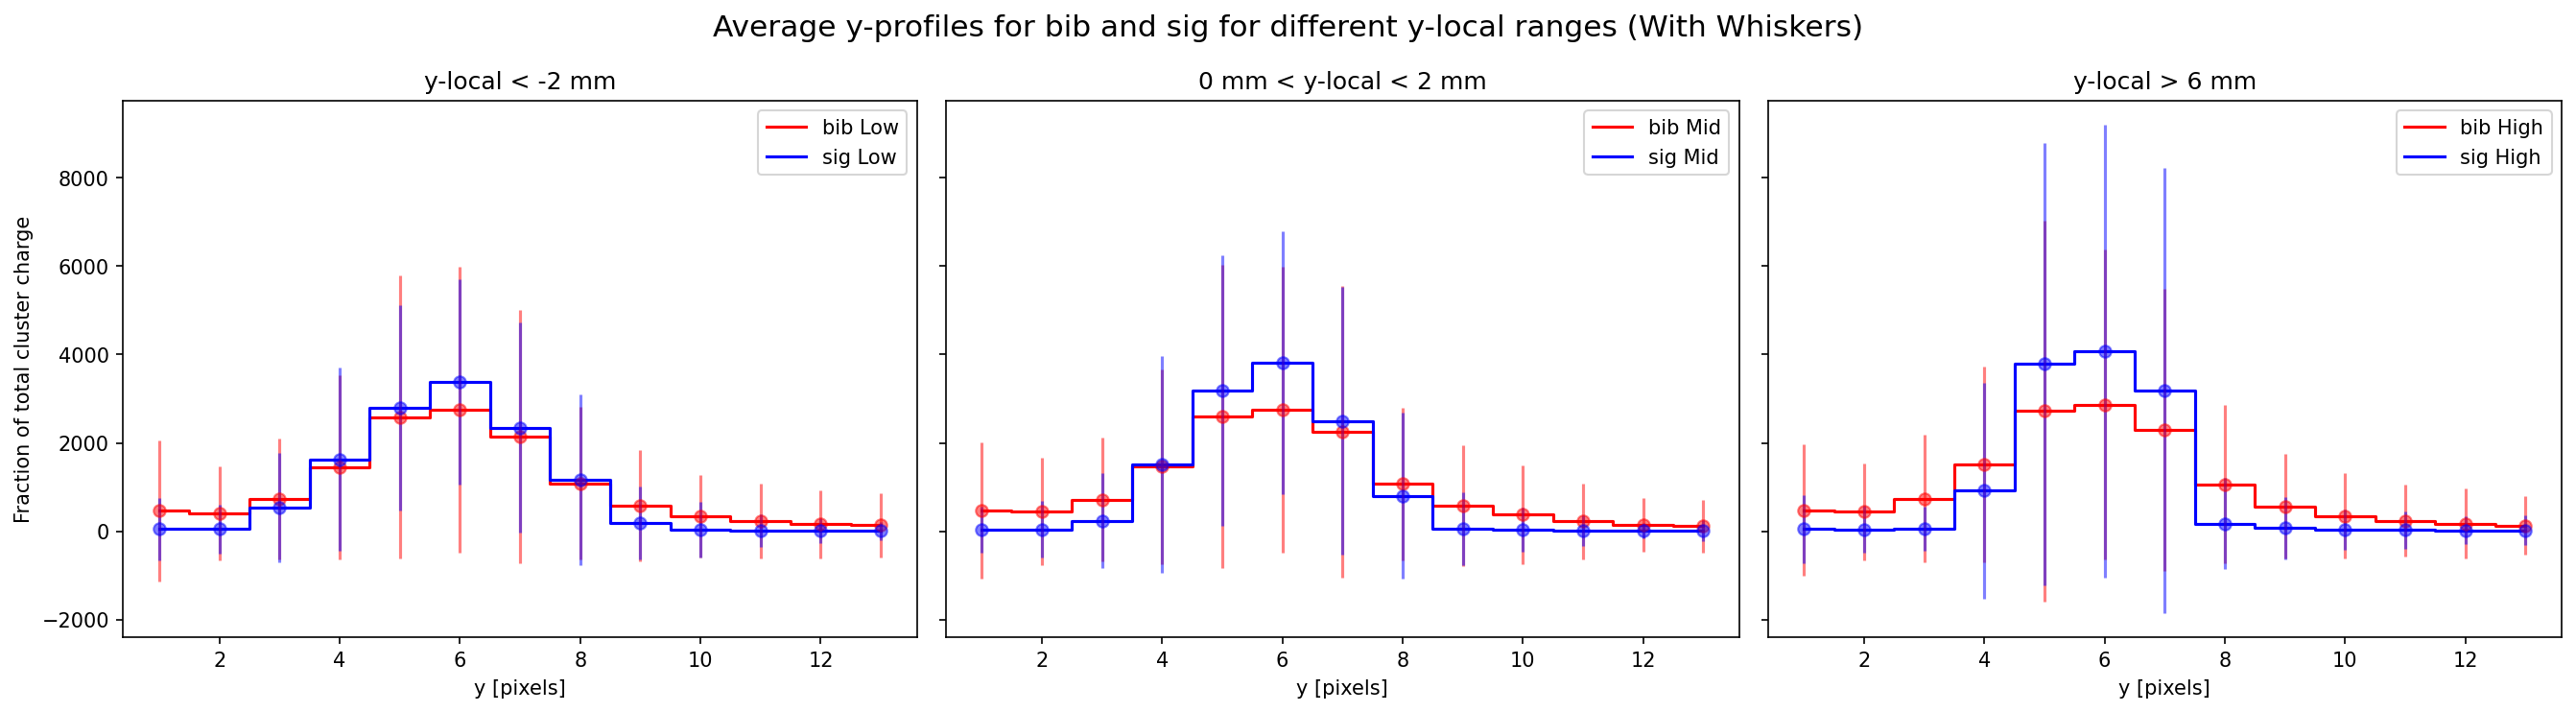

In [393]:
import matplotlib.pyplot as plt

# Define the y-axis and data (replace these with the actual original profile data and std deviations)
yaxis = np.arange(1, 14, 1)
std_profilebibLow = np.std(getYProfiles(clustersbibLow), axis=0)
std_profilebibMid = np.std(getYProfiles(clustersbibMid), axis=0)
std_profilebibHigh = np.std(getYProfiles(clustersbibHigh), axis=0)
std_profilesigLow = np.std(getYProfiles(clusterssigLow), axis=0)
std_profilesigMid = np.std(getYProfiles(clusterssigMid), axis=0)
std_profilesigHigh = np.std(getYProfiles(clusterssigHigh), axis=0)

# Plot
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(18, 5))

# Plot for Low profiles with whiskers
ax[0].step(yaxis, profilebibLow, where="mid", label="bib Low", color='r')
ax[0].step(yaxis, profilesigLow, where="mid", label="sig Low", color='b')
ax[0].errorbar(yaxis, profilebibLow, yerr=std_profilebibLow, fmt='o', color='r', alpha=0.5)
ax[0].errorbar(yaxis, profilesigLow, yerr=std_profilesigLow, fmt='o', color='b', alpha=0.5)
ax[0].legend()
ax[0].set_title("y-local < -2 mm")
ax[0].set_ylabel("Fraction of total cluster charge")
ax[0].set_xlabel("y [pixels]")

# Plot for Mid profiles with whiskers
ax[1].step(yaxis, profilebibMid, where="mid", label="bib Mid", color='r')
ax[1].step(yaxis, profilesigMid, where="mid", label="sig Mid", color='b')
ax[1].errorbar(yaxis, profilebibMid, yerr=std_profilebibMid, fmt='o', color='r', alpha=0.5)
ax[1].errorbar(yaxis, profilesigMid, yerr=std_profilesigMid, fmt='o', color='b', alpha=0.5)
ax[1].legend()
ax[1].set_title("0 mm < y-local < 2 mm")
ax[1].set_xlabel("y [pixels]")

# Plot for High profiles with whiskers
ax[2].step(yaxis, profilebibHigh, where="mid", label="bib High", color='r')
ax[2].step(yaxis, profilesigHigh, where="mid", label="sig High", color='b')
ax[2].errorbar(yaxis, profilebibHigh, yerr=std_profilebibHigh, fmt='o', color='r', alpha=0.5)
ax[2].errorbar(yaxis, profilesigHigh, yerr=std_profilesigHigh, fmt='o', color='b', alpha=0.5)
ax[2].legend()
ax[2].set_title("y-local > 6 mm")
ax[2].set_xlabel("y [pixels]")

# Add an overall title and layout adjustments
fig.suptitle('Average y-profiles for bib and sig for different y-local ranges (With Whiskers)', fontsize=15)
plt.tight_layout()
plt.show()


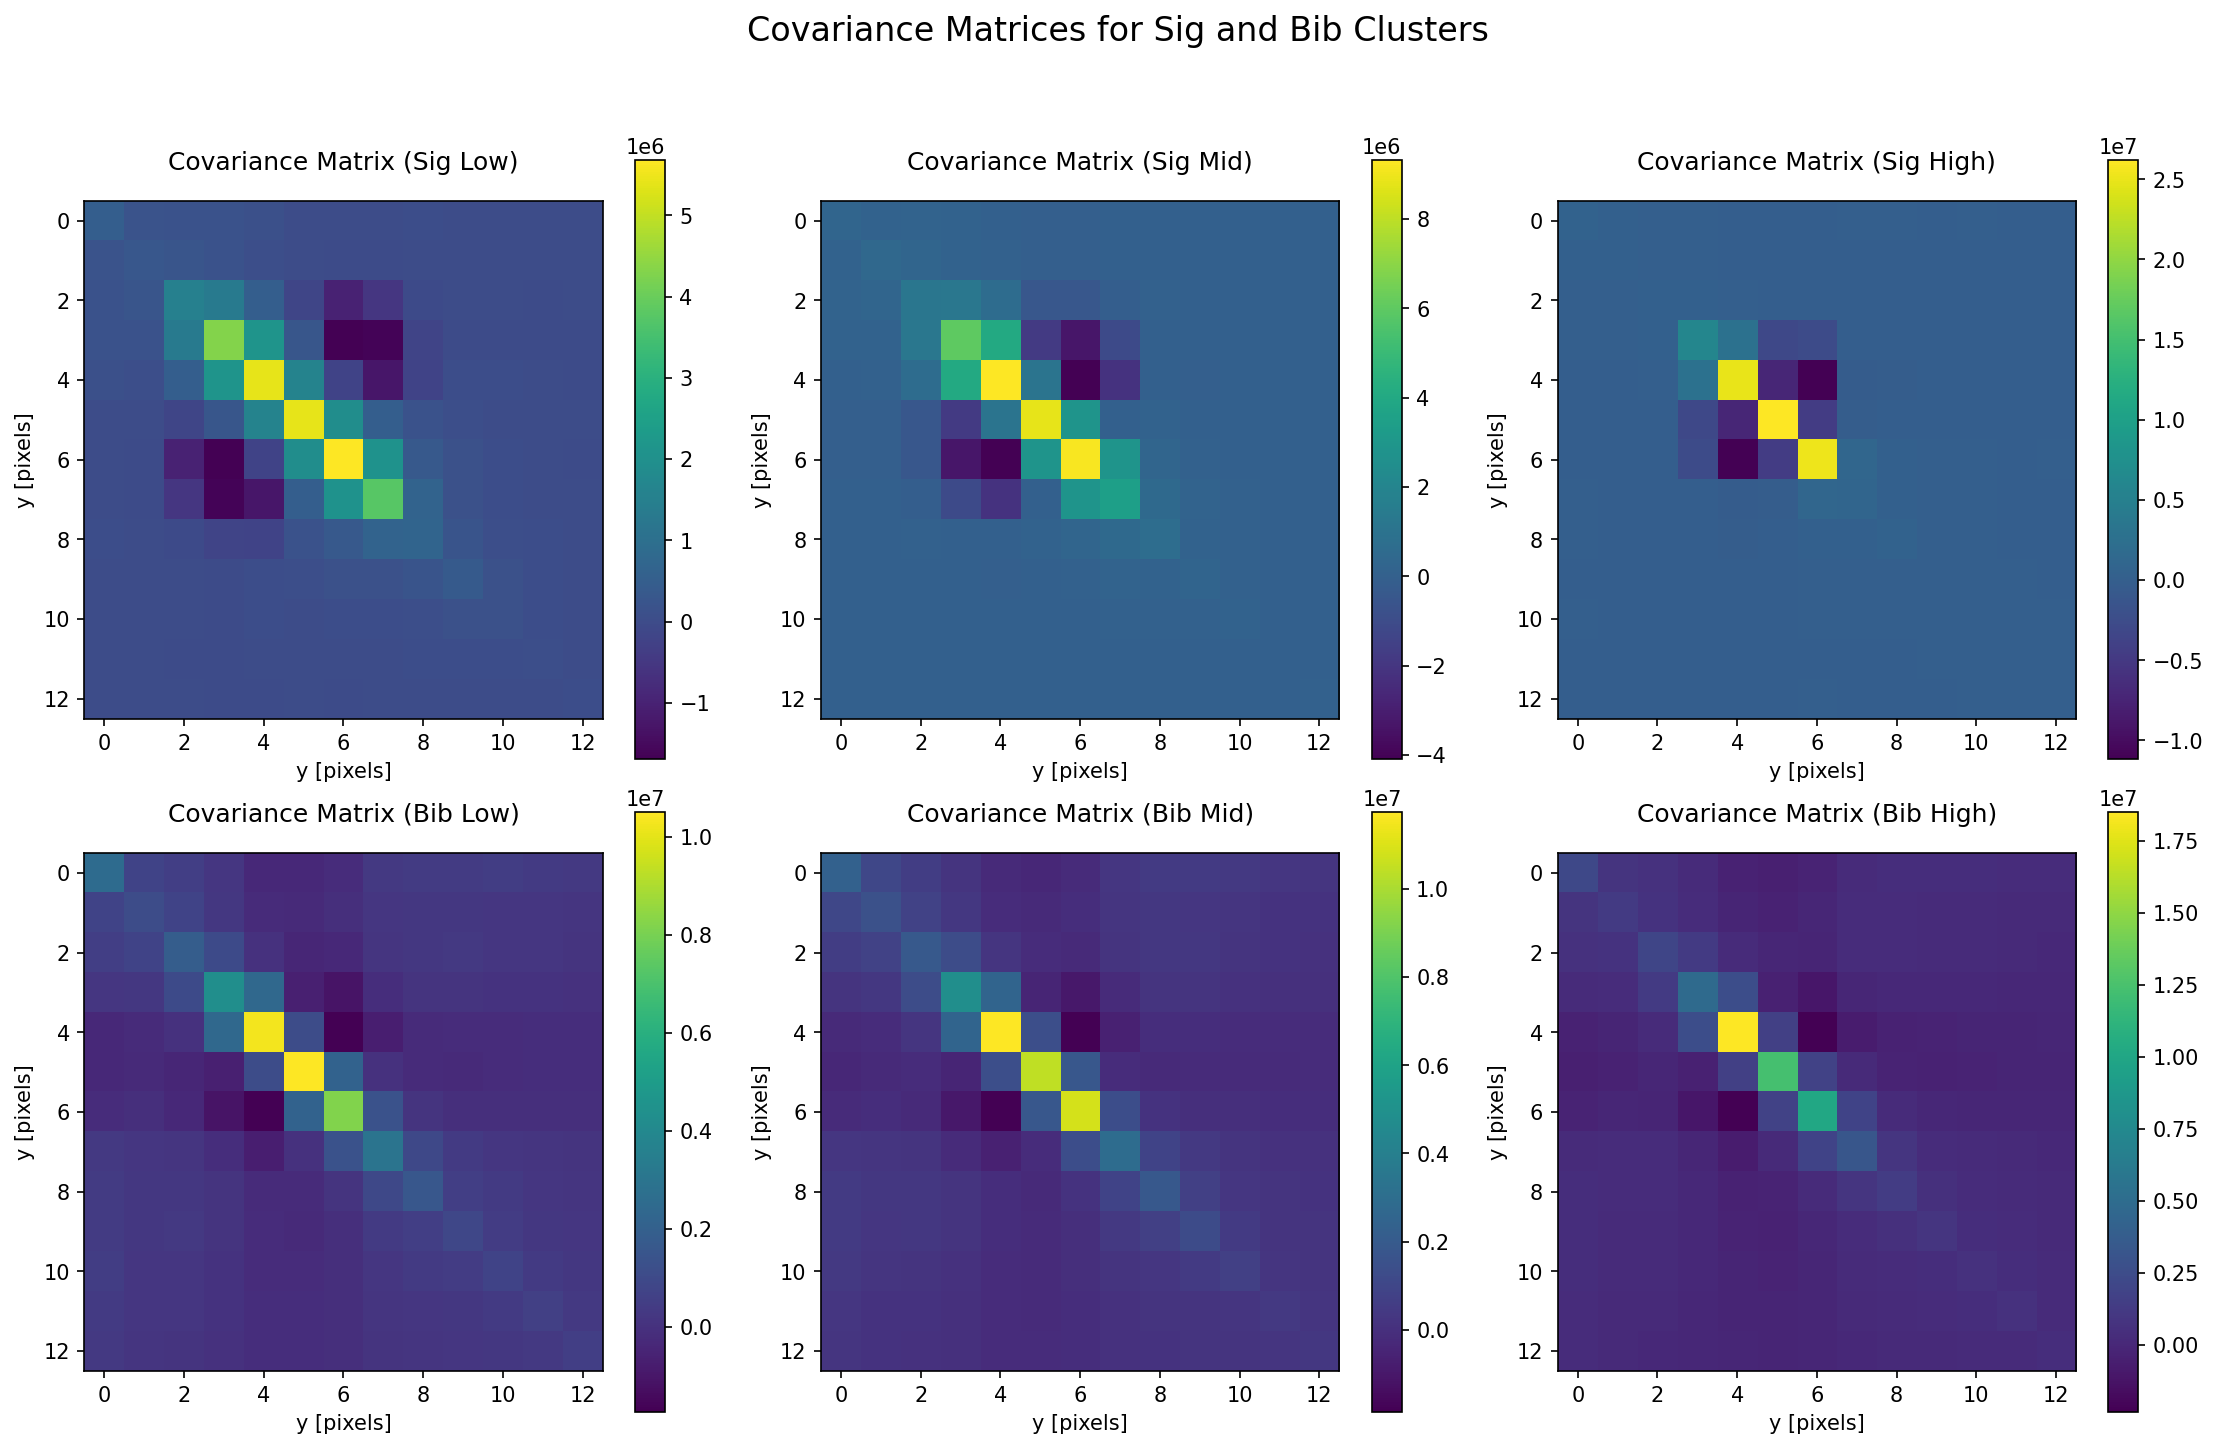

In [ ]:
import matplotlib.pyplot as plt

# Replace these with the actual covariance matrix computation for your data
covariance_matrix_sig_low = getCovarianceMatrixY(clusterssigLow)
covariance_matrix_sig_mid = getCovarianceMatrixY(clusterssigMid)
covariance_matrix_sig_high = getCovarianceMatrixY(clusterssigHigh)

covariance_matrix_bib_low = getCovarianceMatrixY(clustersbibLow)
covariance_matrix_bib_mid = getCovarianceMatrixY(clustersbibMid)
covariance_matrix_bib_high = getCovarianceMatrixY(clustersbibHigh)

# Plot Covariance Matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Sig covariance matrices
im = axes[0, 0].imshow(covariance_matrix_sig_low, cmap='viridis')
axes[0, 0].set_title('Covariance Matrix (Sig Low)', pad=15)  # Add padding to separate title
axes[0, 0].set_xlabel('y [pixels]')
axes[0, 0].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[0, 0])

im = axes[0, 1].imshow(covariance_matrix_sig_mid, cmap='viridis')
axes[0, 1].set_title('Covariance Matrix (Sig Mid)', pad=15)
axes[0, 1].set_xlabel('y [pixels]')
axes[0, 1].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[0, 1])

im = axes[0, 2].imshow(covariance_matrix_sig_high, cmap='viridis')
axes[0, 2].set_title('Covariance Matrix (Sig High)', pad=15)
axes[0, 2].set_xlabel('y [pixels]')
axes[0, 2].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[0, 2])

# Bib covariance matrices
im = axes[1, 0].imshow(covariance_matrix_bib_low, cmap='viridis')
axes[1, 0].set_title('Covariance Matrix (Bib Low)', pad=15)
axes[1, 0].set_xlabel('y [pixels]')
axes[1, 0].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[1, 0])

im = axes[1, 1].imshow(covariance_matrix_bib_mid, cmap='viridis')
axes[1, 1].set_title('Covariance Matrix (Bib Mid)', pad=15)
axes[1, 1].set_xlabel('y [pixels]')
axes[1, 1].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[1, 1])

im = axes[1, 2].imshow(covariance_matrix_bib_high, cmap='viridis')
axes[1, 2].set_title('Covariance Matrix (Bib High)', pad=15)
axes[1, 2].set_xlabel('y [pixels]')
axes[1, 2].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[1, 2])

# Set overall title and adjust layout
fig.suptitle('Covariance Matrices for Sig and Bib Clusters', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust padding to prevent overlap
plt.show()


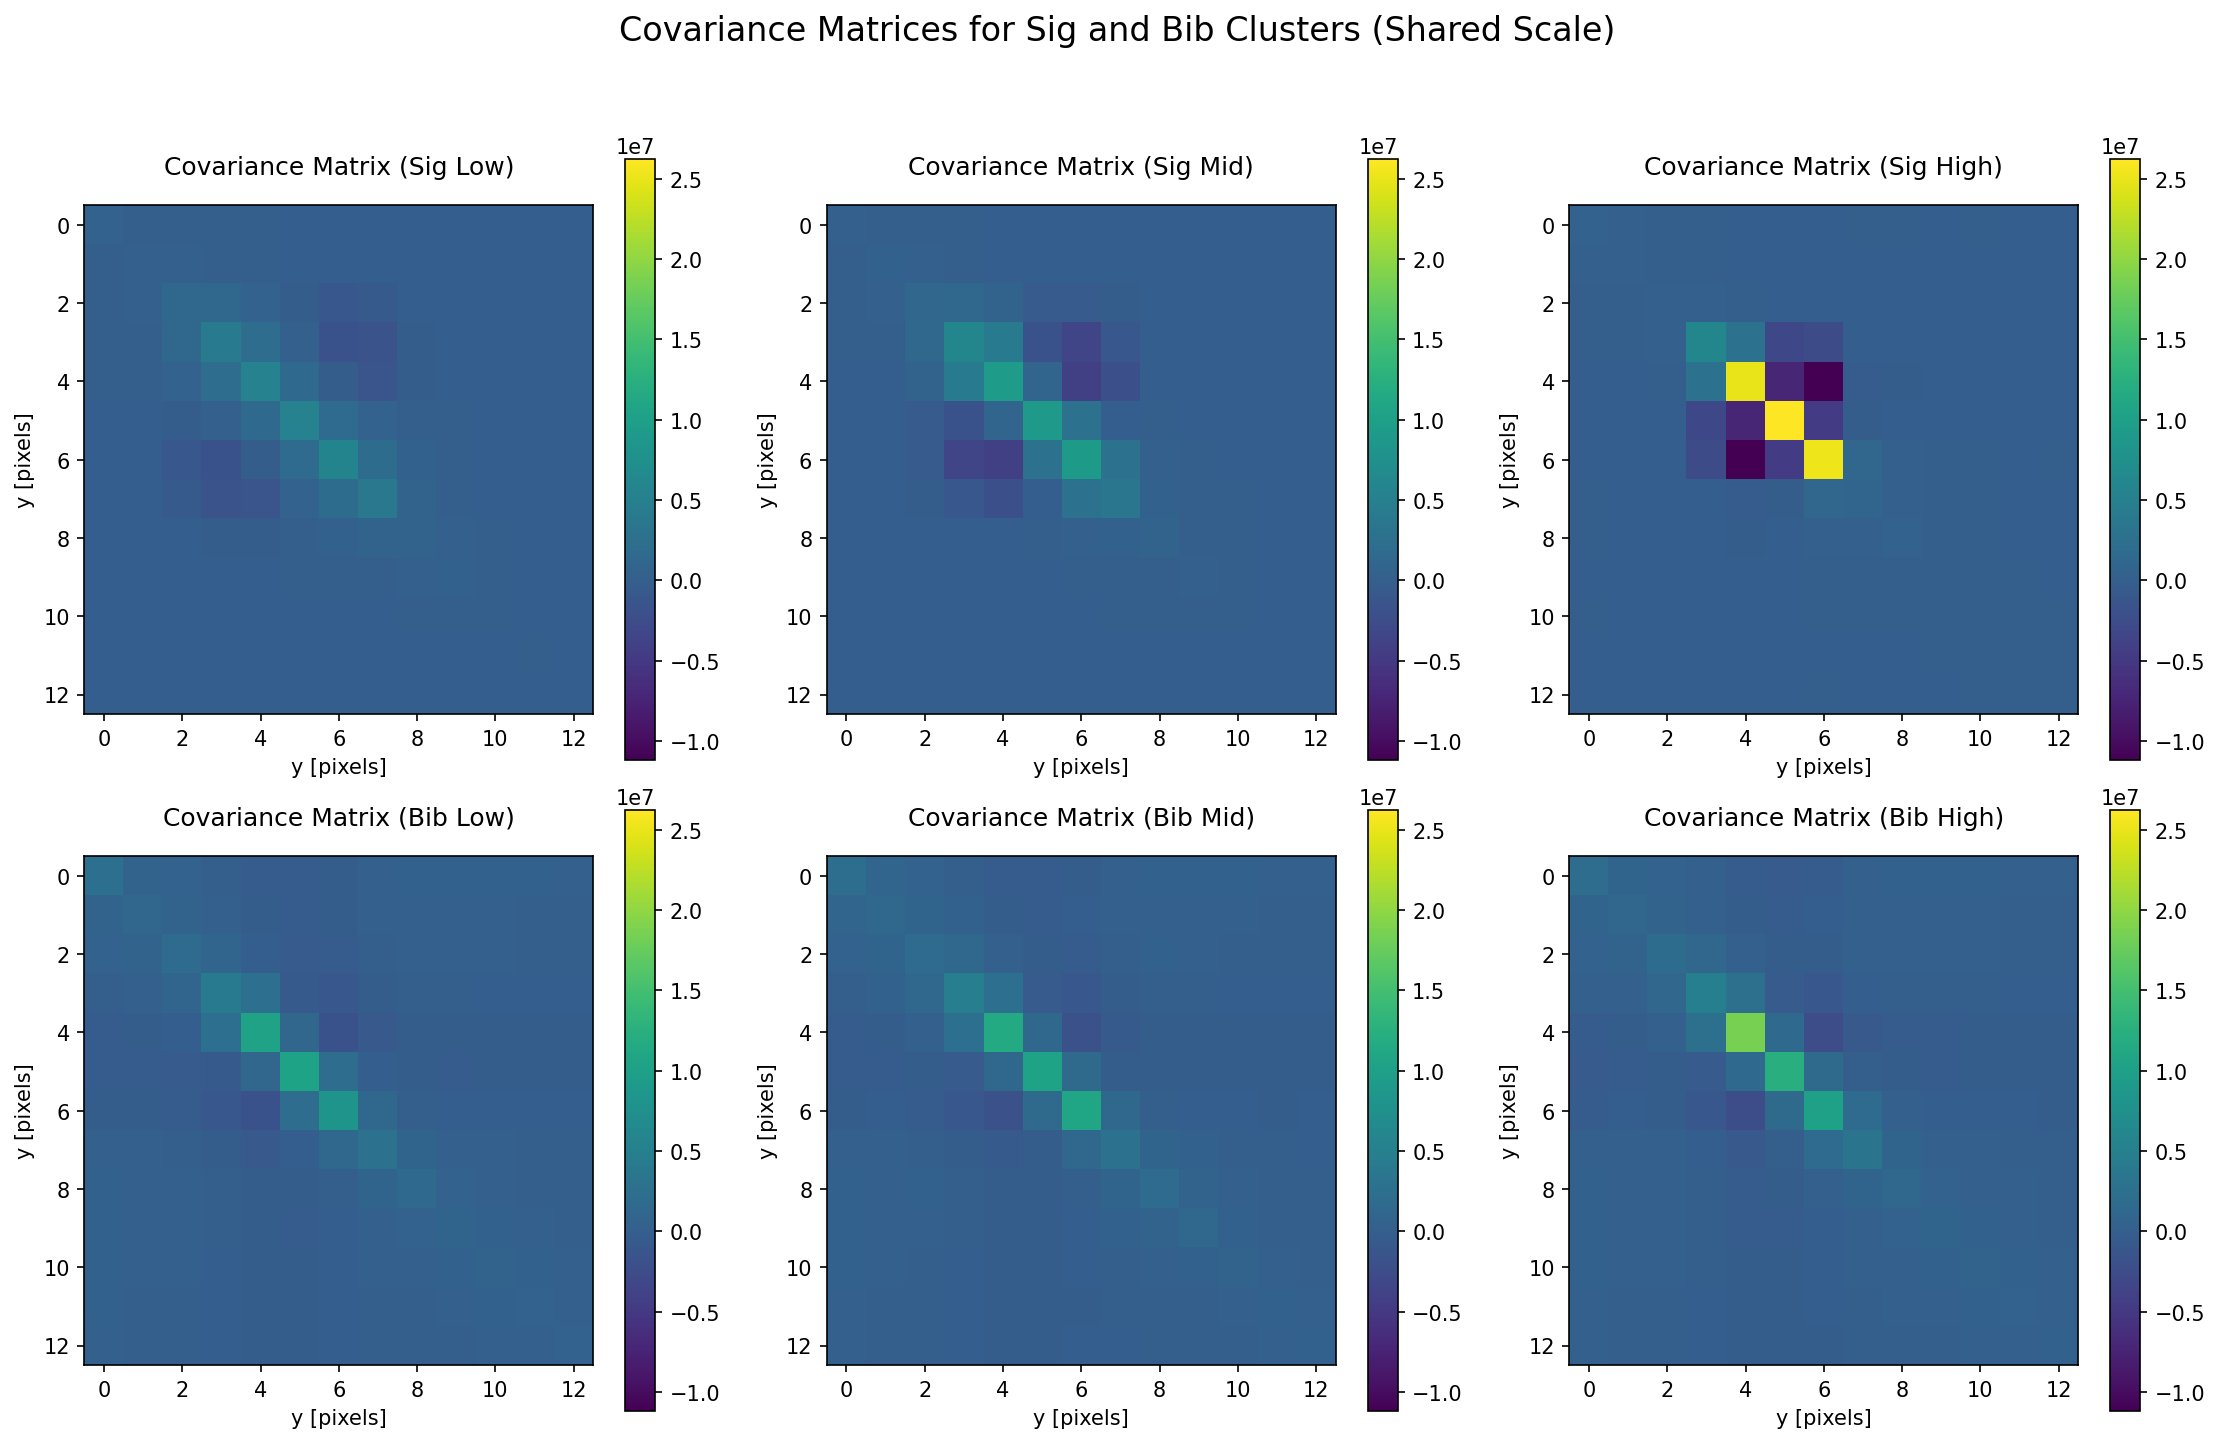

In [305]:
import numpy as np
import matplotlib.pyplot as plt

# Compute global min and max values for all covariance matrices
vmin = min(
    np.min(covariance_matrix_sig_low),
    np.min(covariance_matrix_sig_mid),
    np.min(covariance_matrix_sig_high),
    np.min(covariance_matrix_bib_low),
    np.min(covariance_matrix_bib_mid),
    np.min(covariance_matrix_bib_high)
)
vmax = max(
    np.max(covariance_matrix_sig_low),
    np.max(covariance_matrix_sig_mid),
    np.max(covariance_matrix_sig_high),
    np.max(covariance_matrix_bib_low),
    np.max(covariance_matrix_bib_mid),
    np.max(covariance_matrix_bib_high)
)

# Plot Covariance Matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Sig covariance matrices
im = axes[0, 0].imshow(covariance_matrix_sig_low, cmap='viridis', vmin=vmin, vmax=vmax)
axes[0, 0].set_title('Covariance Matrix (Sig Low)', pad=15)
axes[0, 0].set_xlabel('y [pixels]')
axes[0, 0].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[0, 0])

im = axes[0, 1].imshow(covariance_matrix_sig_mid, cmap='viridis', vmin=vmin, vmax=vmax)
axes[0, 1].set_title('Covariance Matrix (Sig Mid)', pad=15)
axes[0, 1].set_xlabel('y [pixels]')
axes[0, 1].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[0, 1])

im = axes[0, 2].imshow(covariance_matrix_sig_high, cmap='viridis', vmin=vmin, vmax=vmax)
axes[0, 2].set_title('Covariance Matrix (Sig High)', pad=15)
axes[0, 2].set_xlabel('y [pixels]')
axes[0, 2].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[0, 2])

# Bib covariance matrices
im = axes[1, 0].imshow(covariance_matrix_bib_low, cmap='viridis', vmin=vmin, vmax=vmax)
axes[1, 0].set_title('Covariance Matrix (Bib Low)', pad=15)
axes[1, 0].set_xlabel('y [pixels]')
axes[1, 0].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[1, 0])

im = axes[1, 1].imshow(covariance_matrix_bib_mid, cmap='viridis', vmin=vmin, vmax=vmax)
axes[1, 1].set_title('Covariance Matrix (Bib Mid)', pad=15)
axes[1, 1].set_xlabel('y [pixels]')
axes[1, 1].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[1, 1])

im = axes[1, 2].imshow(covariance_matrix_bib_high, cmap='viridis', vmin=vmin, vmax=vmax)
axes[1, 2].set_title('Covariance Matrix (Bib High)', pad=15)
axes[1, 2].set_xlabel('y [pixels]')
axes[1, 2].set_ylabel('y [pixels]')
plt.colorbar(im, ax=axes[1, 2])

# Set overall title and adjust layout
fig.suptitle('Covariance Matrices for Sig and Bib Clusters (Shared Scale)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust padding to prevent overlap
plt.show()


In [306]:
# Lets Find the distance
from scipy.stats import chi2

def Mahalanobis_Distance(cov_matrix, mean_vector, random_vector):
    """
    Compute the Mahalanobis distance using the pseudoinverse for singular covariance matrices.

    Parameters:
        cov_matrix (numpy.ndarray): Covariance matrix of the distribution (shape: n x n).
        mean_vector (numpy.ndarray): Mean vector of the distribution (shape: n,).
        random_vector (numpy.ndarray): Input random vector (shape: n,).

    Returns:
        float: The Mahalanobis distance.
    """
    # Convert inputs to numpy arrays if they are not already
    cov_matrix = np.asarray(cov_matrix)
    mean_vector = np.asarray(mean_vector)
    random_vector = np.asarray(random_vector)

    # Ensure the dimensions match
    if mean_vector.shape[0] != random_vector.shape[0]:
        raise ValueError("Mean vector and random vector dimensions do not match.")
    if cov_matrix.shape[0] != cov_matrix.shape[1] or cov_matrix.shape[0] != mean_vector.shape[0]:
        raise ValueError("Covariance matrix dimensions must match the length of the mean vector.")
    
    # Compute the difference vector
    diff = random_vector - mean_vector

    # Compute the pseudoinverse of the covariance matrix
    inv_cov_matrix = np.linalg.pinv(cov_matrix)
    
    # Compute Mahalanobis distance
    distance = np.sqrt(np.dot(np.dot(diff.T, inv_cov_matrix), diff))
    return distance

def Mahalanobis_Probability(D_M, d):
    """
    Compute the probability (p-value) that a vector belongs to a given distribution.

    Parameters:
        D_M (float): Mahalanobis distance.
        d (int): Degrees of freedom (dimensionality of the vector).

    Returns:
        float: Probability that the vector belongs to the distribution.
    """
    # Compute the squared Mahalanobis distance
    D_M_squared = D_M ** 2
    
    # Compute the cumulative distribution function (CDF) for chi-squared distribution
    chi2_cdf = chi2.cdf(D_M_squared, df=d)
    
    # Compute the probability (p-value)
    p_value = 1 - chi2_cdf
    
    return p_value

In [392]:
cov_matrix = covariance_matrix_bib_mid
mean_vector = profilebibMid

# Random vector to test (same length as mean_vector)
random_vector = np.random.rand(mean_vector.shape[0])

# Compute the Mahalanobis distance
distance = Mahalanobis_Distance(cov_matrix, mean_vector, random_vector)

print(Mahalanobis_Probability(distance, mean_vector.shape[0]))
# At least it works

0.9992463184609572
